# Sudden Stop Model

In this notebook we replicate the baseline model exposed in 

`From Sudden Stops to Fisherian Deflation, Quantitative Theory and Policy` by __Anton Korinek and Enrique G. Mendoza__

The file `sudden_stop.yaml` which is printed below, describes the model, and must be included in the same directory as this notebook.

## importing necessary functions

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from dolo import *
from dolo.algos.dtmscc.time_iteration import time_iteration
from dolo.algos.dtmscc.simulations import plot_decision_rule, simulate

## writing the model

In [3]:
cd ../models

C:\Users\Pablo\Documents\GitHub\dolo\examples\models


In [4]:
filename = 'https://raw.githubusercontent.com/EconForge/dolo/master/examples/models/sudden_stop.yaml'
filename = 'sudden_stop.yaml'
# the model file is coded in a separate file called sudden_stop.yaml
# note how the borrowing constraint is implemented as complementarity condition
pcat(filename)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76


## importing the model

Note, that residuals, are not zero at the calibration we supply. This is because the representative agent is impatient
and we have $\beta<1/R$. In this case it doesn't matter.

By default, the calibrated value for endogenous variables are used as a (constant) starting point for the decision rules.

In [5]:
model = yaml_import('sudden_stop.yaml')
model

Model type detected as 'dtmscc'



Model object:
------------

- name: "Sudden Stop (General)"
- type: "dtmscc"
- file: "sudden_stop.yaml

- residuals:

    transition
        1   : 0.0000 : l = b(-1)

    arbitrage
        1   : 0.0000 : lam = b/c
        2   : -0.0215 : beta*(c(1)/c)**(-sigma)*R - 1    |  lam_inf <= lam <= inf

    auxiliary
        1   : 0.0000 : c = 1 + y + l*R - b

    value
        1   : 0.0000 : V = c**(1.0-sigma)/(1.0-sigma) + beta*V(1)
        2   : 0.0000 : Vc = c**(1.0-sigma)/(1.0-sigma)


In [6]:
# to avoid numerical glitches we choose a relatively high number of grid points
mdr = time_iteration(model, verbose=True, orders=[1000])

Solving WITH complementarities.
------------------------------------------------
| N   |  Error     | Gain     | Time     | nit |
------------------------------------------------
|   1 |  5.014e-01 |      nan |    1.878 |   7 |
|   2 |  1.600e-01 |    0.319 |    0.235 |   6 |
|   3 |  7.472e-02 |    0.467 |    0.221 |   6 |
|   4 |  4.065e-02 |    0.544 |    0.198 |   5 |
|   5 |  2.388e-02 |    0.587 |    0.204 |   5 |
|   6 |  1.933e-02 |    0.809 |    0.354 |   9 |
|   7 |  1.609e-02 |    0.832 |    0.234 |   6 |
|   8 |  1.370e-02 |    0.852 |    0.200 |   5 |
|   9 |  1.187e-02 |    0.867 |    0.148 |   4 |
|  10 |  1.049e-02 |    0.883 |    0.112 |   3 |
|  11 |  9.381e-03 |    0.894 |    0.138 |   3 |
|  12 |  8.467e-03 |    0.903 |    0.120 |   3 |
|  13 |  7.711e-03 |    0.911 |    0.126 |   3 |
|  14 |  7.060e-03 |    0.916 |    0.123 |   3 |
|  15 |  6.503e-03 |    0.921 |    0.078 |   2 |
|  16 |  6.016e-03 |    0.925 |    0.102 |   2 |
|  17 |  4.611e-03 |    0.766 |    0.

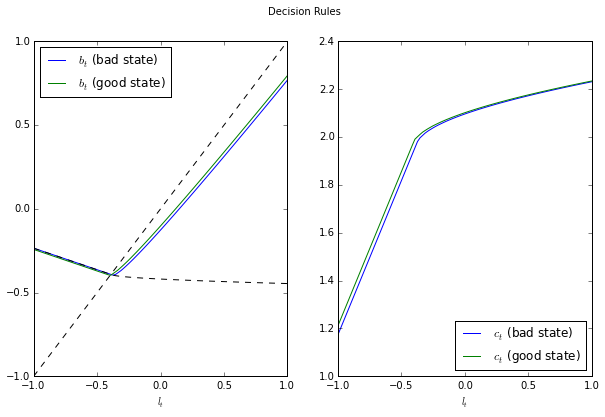

In [7]:
# produce the plots
n_steps = 100

figure(figsize(10,6))
subplot(121)
plot_decision_rule(model, mdr, 'l', 'b', i0=0, n_steps=n_steps, label='$b_t$ (bad state)' )
plot_decision_rule(model, mdr, 'l', 'b', i0=1, n_steps=n_steps, label='$b_t$ (good state)' )
plot_decision_rule(model, mdr, 'l', 'l', i0=1, n_steps=n_steps, linestyle='--', color='black' )
#plot(df['l'], df['l'], linestyle='--', color='black')

# to plot the borrowing limit, we produce a dataframe df which contains all series
# (note that we don't supply a variable name to plot, only the state 'l')

lam_inf = model.get_calibration('lam_inf')
df = plot_decision_rule(model, mdr, 'l', i0=0, n_steps=n_steps)
plot(df['l'], lam_inf*df['c'], linestyle='--', color='black')

xlabel('$l_t$')

legend(loc= 'upper left')


subplot(122)
plot_decision_rule(model, mdr, 'l', 'c', i0=0, n_steps=n_steps, label='$c_t$ (bad state)' )
plot_decision_rule(model, mdr, 'l', 'c', i0=1, n_steps=n_steps, label='$c_t$ (good state)' )
legend(loc= 'lower right')
xlabel('$l_t$')

suptitle("Decision Rules")


In [8]:
## stochastic simulations

In [9]:
i_0 = 1 # we start from the good state
sim = simulate(model, mdr, i_0, s0=0.5, n_exp=1, horizon=100) # markov_indices=markov_indices)

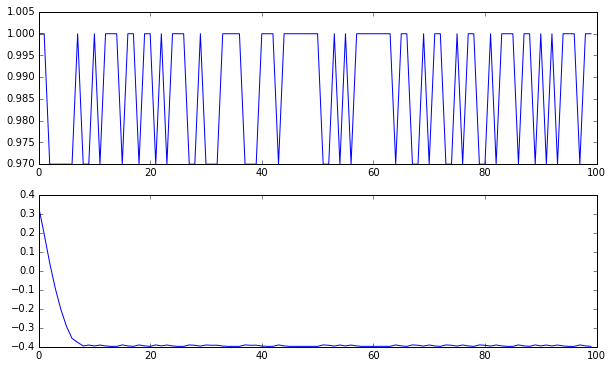

In [10]:
subplot(211)
plot(sim['y'])
subplot(212)
plot(sim['b'])

## Sensitivity analysis

Here we want to compare the saving behaviour as a function of risk aversion $\sigma$.
We contrast the baseline $\sigma=2$ with the high aversion scenario $\sigma=16$.

In [11]:
# we solve the model with sigma=16
model.set_calibration(sigma=16.0)
mdr_high_gamma = time_iteration(model, verbose=True, orders=[1000])

Solving WITH complementarities.
------------------------------------------------
| N   |  Error     | Gain     | Time     | nit |
------------------------------------------------
|   1 |  5.133e-01 |      nan |    0.395 |  10 |
|   2 |  1.703e-01 |    0.332 |    0.295 |   8 |
|   3 |  8.435e-02 |    0.495 |    0.284 |   7 |
|   4 |  5.005e-02 |    0.593 |    0.277 |   7 |
|   5 |  3.292e-02 |    0.658 |    0.281 |   7 |
|   6 |  2.313e-02 |    0.703 |    0.281 |   7 |
|   7 |  1.702e-02 |    0.736 |    0.268 |   7 |
|   8 |  1.295e-02 |    0.761 |    0.267 |   7 |
|   9 |  1.011e-02 |    0.780 |    0.286 |   7 |
|  10 |  8.045e-03 |    0.796 |    0.271 |   7 |
|  11 |  6.501e-03 |    0.808 |    0.283 |   7 |
|  12 |  5.316e-03 |    0.818 |    0.268 |   7 |
|  13 |  4.387e-03 |    0.825 |    0.249 |   6 |
|  14 |  3.647e-03 |    0.831 |    0.294 |   7 |
|  15 |  3.048e-03 |    0.836 |    0.279 |   7 |
|  16 |  2.558e-03 |    0.839 |    0.256 |   6 |
|  17 |  2.206e-03 |    0.863 |    0.

    Did not converge


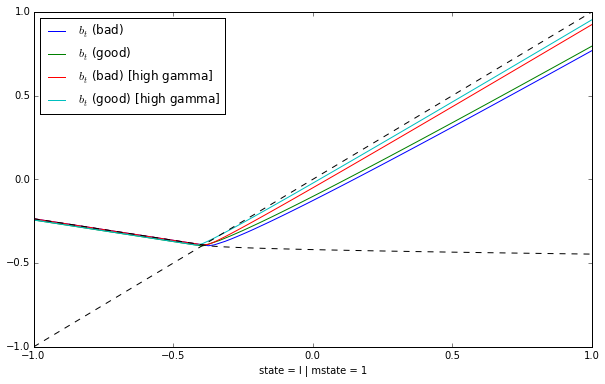

In [12]:
# now we compare the decision rules with low and high risk aversion
plot_decision_rule(model, mdr, 'l', 'b', i0=0, n_steps=n_steps, label='$b_t$ (bad)' )
plot_decision_rule(model, mdr, 'l', 'b', i0=1, n_steps=n_steps, label='$b_t$ (good)' )
plot_decision_rule(model, mdr_high_gamma, 'l', 'b', i0=0, n_steps=n_steps, label='$b_t$ (bad) [high gamma]' )
plot_decision_rule(model, mdr_high_gamma, 'l', 'b', i0=1, n_steps=n_steps, label='$b_t$ (good) [high gamma]' )
plot(df['l'], df['l'], linestyle='--', color='black')
plot(df['l'], -0.2*df['c'], linestyle='--', color='black')
legend(loc= 'upper left')